## Open notebook in:
| Colab                                 |  
|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolepcx/transformers-the-definitive-guide/blob/master/CH03/ch03_ViT_embeddings_tokens.ipynb)                                             

#About this notebook


In this notebook, you will use the custom PyTorch module for patch embedding, which is a critical component in [Vision Transformers](https://arxiv.org/abs/2010.11929) (ViTs). The `PatchEmbedding` class takes an input image and divides it into smaller patches, then transforms each patch into a vector embedding. This is achieved by:

* Dividing the image into non-overlapping patches
* Transforming each patch into a fixed-dimensional embedding using a linear layer
* Adding a classification token and positional embeddings to the sequence of patch embeddings

The module is designed to work with images of size 28x28 pixels, typical for the MNIST dataset, where each patch is 7x7 pixels.

You apply this patch embedding process to a sample image from the MNIST dataset. Additionally, you will visualize the original image with overlaid patch boundaries to illustrate how the image is segmented into patches.




In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.9 MB/s eta 0:00:00


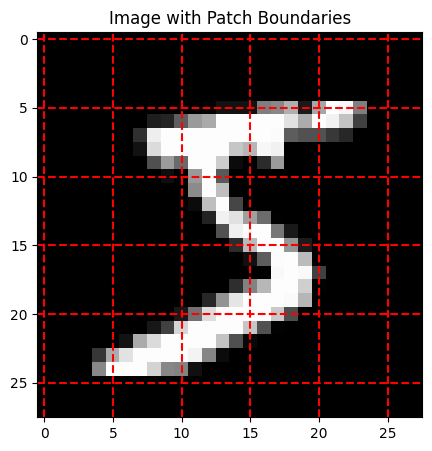

In [ ]:
import torch
import torch.nn as nn
from einops import rearrange
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

class PatchEmbedding(nn.Module):
    def __init__(self, image_size=28, patch_size=7, channels=1, dim=64):
        super().__init__()
        assert image_size % patch_size == 0, 'Image dimensions must be divisible by the patch size'
        num_patches = (image_size // patch_size) ** 2
        patch_dim = channels * patch_size ** 2

        self.patch_size = patch_size

        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.patch_to_embedding = nn.Linear(patch_dim, dim)
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))

    def forward(self, img):
        p = self.patch_size

        # Rearrange the image into patches
        x = rearrange(img, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p)
        x = self.patch_to_embedding(x)

        # Add classification token and positional embedding
        cls_tokens = self.cls_token.expand(img.shape[0], -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist = MNIST(root='./data', train=True, download=True, transform=transform)

# Get a single image
image, label = mnist[0]
image = image.squeeze().numpy()  # Convert to numpy array for plotting

# Instantiate PatchEmbedding and apply it to the image
patch_embedding = PatchEmbedding(image_size=28, patch_size=7, channels=1, dim=64)

# Plot the original image and the image with patch boundaries
fig, ax = plt.subplots(figsize=(5, 5))

# Original image
ax.imshow(image, cmap='gray')
ax.set_title('Image with Patch Boundaries')

# Draw lines to show patch boundaries
patch_size = 5
for i in range(0, 28, patch_size):
    ax.axhline(i, color='red', linestyle='--')
    ax.axvline(i, color='red', linestyle='--')

plt.show()
